# Business Understanding

## Problem Statement
Each year, students applying for tertiary education through KUCCPS (Kenya Universities and Colleges Central Placement Service) face challenges in identifying suitable course clusters. These challenges often arise due to the dynamic nature of cluster point requirements, varied student performance, and changes in institutional offerings. Students frequently lack the tools or insights to make data-driven decisions about which courses they are likely to qualify for, resulting in suboptimal course applications or outright rejections

## Objectives
The main objective of this project is to: 
1. Build a predictive model that predicts the most probable course cluster cutoff based  historical trends.

2. Recommends suitable courses aligned with the predicted cluster and student's performance.

3. Improves decision-making for applicants by providing personalized, data-driven course suggestions.
 

# Data Understanding

### Data Collection

The data for this project were sourced by scraping the KUCCPS (Kenya Universities and Colleges Central Placement Service) website. The datasets used include:

1. [**University Courses**](https://statics.kuccps.net/uploads/globalFiles/DEGREE_CUTOFFS_14-07-2025.pdf):  
   This dataset contains detailed information about university courses offered through KUCCPS. The data is stored in a SQL file.

2. [**Programme Minimum Requirements**](https://statics.kuccps.net/uploads/globalFiles/DEGREE_CLUSTER_DOCUMENT_2025_03.pdf):  
   This dataset outlines the minimum academic requirements needed for each programme, helping students understand eligibility criteria for university courses.
 

These datasets provide a comprehensive view of the available academic programmes, their entry requirements, and the institutions offering them, forming the basis for further analysis and insights.


## Loading Libraries

In [1]:
import pandas as pd  # data manipulation
import numpy as np  # numerical operations
import re  #  regular expressions (text processing)
import seaborn as sns  #  data visualization
import matplotlib.pyplot as plt  #plotting graphs

# machine learning tools
from sklearn.compose import ColumnTransformer  # apply transformations to specific columns
from sklearn.pipeline import Pipeline  # build ML pipelines
from sklearn.ensemble import RandomForestRegressor  # Random Forest regression model
from sklearn.neural_network import MLPRegressor  # Neural network regressor 
from xgboost import XGBRegressor  # Extreme Gradient Boosting regressor

# model training and evaluation
from sklearn.model_selection import train_test_split  # split data into train/test sets
from sklearn.metrics import r2_score, mean_squared_error  #  model evaluation metrics


C:\Users\Mich\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Loading dataset**

In [2]:
cutoff_df = pd.read_excel("degree_cutoffs.xlsx")

In [3]:
cutoff_df.head(5)

,programme_code,institution,programme_name,cutoff_2018,cutoff_2019,cutoff_2020,cutoff_2021,cutoff_2022,cutoff_2023,cutoff_2024,#,key,institution_type,parent_ministry,location
0,1105101,CHUKA UNIVERSITY,BACHELOR OF ARTS,25.798,26.729,28.419,25.974,28.566,23.714,24.851,42,CU,Public,Ministry of Education,THARAKA NITHI COUNTY
1,1087101,KISII UNIVERSITY,BACHELOR OF ARTS,23.93,24.763,27.318,22.926,26.315,24.286,22.173,262,KSU,Public,Ministry of Education,KISII COUNTY
2,1073101,RONGO UNIVERSITY,BACHELOR OF ARTS,-,-,-,-,27.808,24.574,24.252,407,RNU,Public,Ministry of Education,MIGORI COUNTY
3,1057101,EGERTON UNIVERSITY,BACHELOR OF ARTS,24.851,26.54,28.227,22.926,26.783,24.188,21.799,51,EU,Public,Ministry of Education,NAKURU COUNTY
4,1164101,MULTIMEDIA UNIVERSITY OF KENYA,"BACHELOR OF ARTS (PSYCHOLOGY, SOCIOLOGY & POLI...",-,-,-,24.456,26.207,22.449,22.851,348,MMU,Public,Ministry of Education,NAIROBI COUNTY


In [4]:
cutoff_df.tail(5)

,programme_code,institution,programme_name,cutoff_2018,cutoff_2019,cutoff_2020,cutoff_2021,cutoff_2022,cutoff_2023,cutoff_2024,#,key,institution_type,parent_ministry,location
2045,1112470,TECHNICAL UNIVERSITY OF KENYA,BACHELOR OF TECHNOLOGY (INSTITUTIONAL MANAGEMENT),25.52,26.712,23.629,26.342,27.94,23.301,26.419,446,TUK,Public,Ministry of Education,NAIROBI COUNTY
2046,1117630,PWANI UNIVERSITY,BACHELOR OF ARTS IN ISLAMIC STUDIES,25.639,26.818,20.991,19.956,19.67,20.93,-,393,PU,Public,Ministry of Education,KILIFI COUNTY
2047,1515692,TOM MBOYA UNIVERSITY,BACHELOR OF SCIENCE (GEOGRAPHY AND NATURAL RES...,24.93,24.952,16.791,19.921,22.457,18.144,-,464,TMU,Public,Ministry of Education,HOMA BAY COUNTY
2048,1229692,MASENO UNIVERSITY,BACHELOR OF SCIENCE (GEOGRAPHY AND NATURAL RES...,30.588,25.562,16.791,26.022,26.024,18.144,22.596,315,MSU,Public,Ministry of Education,KISUMU COUNTY
2049,1253260,MOI UNIVERSITY,BACHELOR OF SCIENCE IN COMMUNITY HEALTH EDUCATION,26.541,29,29.471,17.459,25.577,24.852,-,337,MU,Public,Ministry of Education,UASIN GISHU COUNTY


In [5]:
cutoff_df.programme_name.unique()

array(['BACHELOR OF ARTS',
       'BACHELOR OF ARTS (PSYCHOLOGY, SOCIOLOGY & POLITICAL SCIENCE)',
       'BACHELOR OF ARTS (WITH IT)',
       'BACHELOR OF ARCHITECTURAL STUDIES/BACHELOR OF ARCHITECTURE',
       'BACHELOR OF ARCHITECTURE', 'BACHELOR OF QUANTITY SURVEYING',
       'BACHELOR OF ACTUARIAL SCIENCE',
       'BACHELOR OF SCIENCE (ACTUARIAL SCIENCE WITH IT)',
       'BACHELOR OF SCIENCE (ACTUARIAL SCIENCE)',
       'BACHELOR OF SCIENCE IN ACTUARIAL SCIENCE',
       'BACHELOR OF SCIENCE (ACTUARIAL SCIENCE, WITH IT)',
       'BACHELOR OF SCIENCE (INDUSTRIAL CHEMISTRY)',
       'BACHELOR OF SCIENCE IN INDUSTRIAL CHEMISTRY',
       'BACHELOR OF SCIENCE (INDUSTRIAL CHEMISTRY, WITH IT)',
       'BACHELOR OF SCIENCE (MATHEMATICS)',
       'BACHELOR OF SCIENCE IN MATHEMATICS',
       'BACHELOR OF SCIENCE (MATHEMATICAL SCIENCES, WITH IT)',
       'BACHELOR OF SCIENCE (BIOLOGY)', 'BACHELOR OF SCIENCE IN BIOLOGY',
       'BACHELOR OF SCIENCE IN BIOLOGY ( BOTANY OR ZOOLOGY OPTION)',
     

In [6]:
cutoff_df.institution.unique()

array(['CHUKA UNIVERSITY', 'KISII UNIVERSITY', 'RONGO UNIVERSITY',
       'EGERTON UNIVERSITY', 'MULTIMEDIA UNIVERSITY OF KENYA',
       'KABARNET UNIVERSITY COLLEGE',
       'KOITALEEL SAMOEI UNIVERSITY COLLEGE', 'BOMET UNIVERSITY COLLEGE',
       'THARAKA UNIVERSITY', 'UNIVERSITY OF NAIROBI', 'MOI UNIVERSITY',
       'MACHAKOS UNIVERSITY', 'SOUTH EASTERN KENYA UNIVERSITY',
       'PWANI UNIVERSITY', 'KENYATTA UNIVERSITY', 'TOM MBOYA UNIVERSITY',
       'MASENO UNIVERSITY', 'TECHNICAL UNIVERSITY OF MOMBASA',
       'JOMO KENYATTA UNIVERSITY OF AGRICULTURE AND TECHNOLOGY',
       'TECHNICAL UNIVERSITY OF KENYA', 'KCA UNIVERSITY',
       'JARAMOGI OGINGA ODINGA UNIVERSITY OF SCIENCE AND TECHNOLOGY',
       'GARISSA UNIVERSITY', 'UNIVERSITY OF EMBU',
       'CO-OPERATIVE UNIVERSITY OF KENYA', 'KIRINYAGA UNIVERSITY',
       'KABARAK UNIVERSITY', 'MERU UNIVERSITY OF SCIENCE AND TECHNOLOGY',
       'UNIVERSITY OF KABIANGA', 'CATHOLIC UNIVERSITY OF EASTERN AFRICA',
       'ZETECH UNIVERSITY'

In [7]:
cutoff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   programme_code    2050 non-null   int64 
 1   institution       2050 non-null   object
 2   programme_name    2046 non-null   object
 3   cutoff_2018       2050 non-null   object
 4   cutoff_2019       2050 non-null   object
 5   cutoff_2020       2050 non-null   object
 6   cutoff_2021       2050 non-null   object
 7   cutoff_2022       2050 non-null   object
 8   cutoff_2023       2050 non-null   object
 9   cutoff_2024       2050 non-null   object
 10  #                 2050 non-null   int64 
 11  key               2050 non-null   object
 12  institution_type  2050 non-null   object
 13  parent_ministry   2050 non-null   object
 14  location          2050 non-null   object
dtypes: int64(2), object(13)
memory usage: 240.4+ KB


In [8]:
cutoff_df.describe()

,programme_code,#
count,2.050000e+03,2050.000000
mean,1.265723e+06,279.356585
std,4.995338e+05,155.260442
min,1.053107e+06,2.000000
25%,1.093111e+06,105.000000
50%,1.165143e+06,315.000000
75%,1.249486e+06,428.000000
max,5.535327e+06,492.000000


**Degree Requirements**

In [9]:
degree_req_df = pd.read_excel("degree_requirements_from_text.xlsx")

In [10]:
degree_req_df.head()

,programme_name,cluster,subcluster,subject_1,subject_1_grade,subject_2,subject_2_grade,subject_3,subject_3_grade,subject_4,subject_4_grade
0,Bachelor of Laws (LL.B.),1,1A,ENG/KIS,B,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,Null,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV / any_...,Null
1,Bachelor in Business Administration,2,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null
2,Bachelor of Library & Information Science,2,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null
3,"Bachelor in Business Administration, With IT",2,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null
4,Bachelor of Library and Information Studies,2,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null


In [11]:
degree_req_df.sample(5)

,programme_name,cluster,subcluster,subject_1,subject_1_grade,subject_2,subject_2_grade,subject_3,subject_3_grade,subject_4,subject_4_grade
718,Bachelor of Science (Agriculture Education & E...,19,19I,ENG,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B / any_GROU...,Null,2nd_GROUP_II,Null,KIS / 3rd_GROUP_II / 2nd_GROUP_III / any_GROUP...,Null
501,Bachelor of Science in Nursing,13,13B,BIO,C+,CHE,C+,MAT_ALTERNATIVE_A/PHY,C+,ENG/KIS / 3rd_GROUP_II / any_GROUP_III / any_G...,Null
116,Bachelor of Journalism & Mass Communication,3,3A,ENG/KIS,C+,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B / any_GROU...,Null,Any_GROUP_III,Null,A_GROUP_II / 2nd_GROUP_III / any_GROUP_IV / an...,Null
292,Bachelor of Industrial Technology,5,5E,MAT_ALTERNATIVE_A,C+,PHY,C+,CHE,C+,BIO / any_GROUP_III / any_GROUP_IV / any_GROUP_V,Null
114,Bachelor of Communication and Media Studies,3,3A,ENG/KIS,C+,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B / any_GROU...,Null,Any_GROUP_III,Null,A_GROUP_II / 2nd_GROUP_III / any_GROUP_IV / an...,Null


In [12]:
degree_req_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   programme_name   741 non-null    object
 1   cluster          741 non-null    int64 
 2   subcluster       741 non-null    object
 3   subject_1        741 non-null    object
 4   subject_1_grade  741 non-null    object
 5   subject_2        741 non-null    object
 6   subject_2_grade  741 non-null    object
 7   subject_3        741 non-null    object
 8   subject_3_grade  741 non-null    object
 9   subject_4        741 non-null    object
 10  subject_4_grade  741 non-null    object
dtypes: int64(1), object(10)
memory usage: 63.8+ KB


# Data Cleaning

## Correct Formats

In [13]:
cutoff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   programme_code    2050 non-null   int64 
 1   institution       2050 non-null   object
 2   programme_name    2046 non-null   object
 3   cutoff_2018       2050 non-null   object
 4   cutoff_2019       2050 non-null   object
 5   cutoff_2020       2050 non-null   object
 6   cutoff_2021       2050 non-null   object
 7   cutoff_2022       2050 non-null   object
 8   cutoff_2023       2050 non-null   object
 9   cutoff_2024       2050 non-null   object
 10  #                 2050 non-null   int64 
 11  key               2050 non-null   object
 12  institution_type  2050 non-null   object
 13  parent_ministry   2050 non-null   object
 14  location          2050 non-null   object
dtypes: int64(2), object(13)
memory usage: 240.4+ KB


In [14]:
degree_req_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   programme_name   741 non-null    object
 1   cluster          741 non-null    int64 
 2   subcluster       741 non-null    object
 3   subject_1        741 non-null    object
 4   subject_1_grade  741 non-null    object
 5   subject_2        741 non-null    object
 6   subject_2_grade  741 non-null    object
 7   subject_3        741 non-null    object
 8   subject_3_grade  741 non-null    object
 9   subject_4        741 non-null    object
 10  subject_4_grade  741 non-null    object
dtypes: int64(1), object(10)
memory usage: 63.8+ KB


In [15]:
cutoff_df['programme_code'] = cutoff_df['programme_code'].astype(str)

In [16]:
cutoff_cols = ['2018', '2019', '2020', '2021', '2022', '2023', '2024']

for col in cutoff_cols:
    col = "cutoff_"+col
    cutoff_df[col] = pd.to_numeric(cutoff_df[col], errors='coerce')  # converts to float, sets invalid parsing as NaN


In [17]:
cutoff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   programme_code    2050 non-null   object 
 1   institution       2050 non-null   object 
 2   programme_name    2046 non-null   object 
 3   cutoff_2018       1550 non-null   float64
 4   cutoff_2019       1634 non-null   float64
 5   cutoff_2020       1736 non-null   float64
 6   cutoff_2021       1797 non-null   float64
 7   cutoff_2022       1848 non-null   float64
 8   cutoff_2023       1889 non-null   float64
 9   cutoff_2024       797 non-null    float64
 10  #                 2050 non-null   int64  
 11  key               2050 non-null   object 
 12  institution_type  2050 non-null   object 
 13  parent_ministry   2050 non-null   object 
 14  location          2050 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 240.4+ KB


## Missing Values

In [18]:
cutoff_df.isna().sum()

programme_code         0
institution            0
programme_name         4
cutoff_2018          500
cutoff_2019          416
cutoff_2020          314
cutoff_2021          253
cutoff_2022          202
cutoff_2023          161
cutoff_2024         1253
#                      0
key                    0
institution_type       0
parent_ministry        0
location               0
dtype: int64

In [19]:
nan_years = ["cutoff_"+str(y) for y in range(2018, 2025)]

In [20]:
cutoff_df[nan_years] = cutoff_df[nan_years].ffill(axis=1)

In [21]:
cutoff_df.isna().sum()

programme_code        0
institution           0
programme_name        4
cutoff_2018         500
cutoff_2019         386
cutoff_2020         289
cutoff_2021         216
cutoff_2022         172
cutoff_2023         130
cutoff_2024          91
#                     0
key                   0
institution_type      0
parent_ministry       0
location              0
dtype: int64

In [22]:
cutoff_df[cutoff_df['programme_name'].isna()]

,programme_code,institution,programme_name,cutoff_2018,cutoff_2019,cutoff_2020,cutoff_2021,cutoff_2022,cutoff_2023,cutoff_2024,#,key,institution_type,parent_ministry,location
216,1240120,MERU UNIVERSITY OF SCIENCE AND TECHNOLOGY BSC ...,NaN,23.582,24.115,16.791,17.459,16.974,15.683,15.683,331,MUST,Public,Ministry of Education,MERU COUNTY
1799,1555252,KENYA ASSEMBLIES OF GOD EAST UNIVERSITY BA IN ...,NaN,NaN,28.354,20.991,19.956,19.670,20.930,20.930,114,KAGEU,Private,Private Institution,NAIROBI COUNTY
1944,1555254,KENYA ASSEMBLIES OF GOD EAST UNIVERSITY BA IN ...,NaN,NaN,25.866,20.991,19.956,19.670,20.930,20.930,114,KAGEU,Private,Private Institution,NAIROBI COUNTY
1998,1555253,KENYA ASSEMBLIES OF GOD EAST UNIVERSITY BA IN ...,NaN,NaN,NaN,20.991,19.956,19.670,20.930,20.930,114,KAGEU,Private,Private Institution,NAIROBI COUNTY


In [23]:
cutoff_df['programme_name_code'] = cutoff_df['programme_code'].str[-3:]

In [24]:
# Get indices of rows with NaN programme_name
nan_indices = cutoff_df[cutoff_df['programme_name'].isna()].index

# Keep track of rows to drop
rows_to_drop = []

for i in nan_indices:
    last3 = cutoff_df.loc[i, 'programme_code'][-3:]
    cutoff_df['programme_name_code']
    # Find first matching row with the same last 3 digits and a non-null name
    match = cutoff_df[(cutoff_df['programme_code'].str[-3:] == last3) & (cutoff_df['programme_name'].notna())]
    
    if not match.empty:
        cutoff_df.loc[i, 'programme_name'] = match.iloc[0]['programme_name']
    else:
        rows_to_drop.append(i)

# Drop unmatched rows
cutoff_df.drop(index=rows_to_drop, inplace=True)

In [25]:
cutoff_df.isna().sum()

programme_code           0
institution              0
programme_name           0
cutoff_2018            497
cutoff_2019            385
cutoff_2020            289
cutoff_2021            216
cutoff_2022            172
cutoff_2023            130
cutoff_2024             91
#                        0
key                      0
institution_type         0
parent_ministry          0
location                 0
programme_name_code      0
dtype: int64

In [26]:
cutoff_df.dropna(subset=['cutoff_2024'], inplace=True)

In [27]:
cutoff_df.isna().sum()

programme_code           0
institution              0
programme_name           0
cutoff_2018            406
cutoff_2019            294
cutoff_2020            198
cutoff_2021            125
cutoff_2022             81
cutoff_2023             39
cutoff_2024              0
#                        0
key                      0
institution_type         0
parent_ministry          0
location                 0
programme_name_code      0
dtype: int64

In [28]:
degree_req_df.isna().sum()

programme_name     0
cluster            0
subcluster         0
subject_1          0
subject_1_grade    0
subject_2          0
subject_2_grade    0
subject_3          0
subject_3_grade    0
subject_4          0
subject_4_grade    0
dtype: int64

## Feature Engineering

In [29]:
def normalize_programme_name(name):
    name = name.upper().strip()

    # Replace content inside brackets (even unclosed) with "IN <content>"
    name = re.sub(r'\(\s*([^()\n]+?)\s*\)?', r'IN \1', name)

    # Convert "BACHELOR IN" → "BACHELOR OF"
    name = re.sub(r'\bBACHELOR IN\b', 'BACHELOR OF', name)

    # Replace '&' with 'AND'
    name = re.sub(r'\s*&\s*', ' AND ', name)

    # Fix missing spacing in words like 'EDUCATIONIN' → 'EDUCATION IN'
    name = re.sub(r'([A-Z])IN\b', r'\1 IN', name)

    # Normalize 'WITH IT' phrasing
    name = re.sub(r',?\s*WITH\s+IT\.?', ' WITH IT', name)
    name = re.sub(r'\s+IN\s+WITH IT', ' WITH IT', name)

    # Remove redundant 'IN B.SC', 'IN B.COM', etc.
    name = re.sub(r'IN\s+B\.?SC\.?|IN\s+B\.?COM\.?|IN\s+B\.?TECH\.?|IN\s+B\.?ENG\.?|IN\s+B\.?ED\.?|IN\s+LLB\.?|IN\s+LL\.?B\.?', '', name)

    # Standardize "Bachelor of Laws in LL.B."
    name = re.sub(r'(BACHELOR OF LAWS)(?: IN)?\s+LL\.?B\.?\.?\)?', r'\1 IN LL.B.', name)

    # Standardize MBCHB degrees
    name = re.sub(r'(BACHELOR OF MEDICINE AND BACHELOR OF SURGERY)(?: IN WITH IT)?', r'\1', name)
    name = re.sub(r'(BACHELOR OF MEDICINE AND BACHELOR OF SURGERY)(?: IN)?\s+M\.?B\.?\.?C\.?H\.?\.?B\.?', r'\1 IN MBCHB', name)

    # Fix missing 'IN' between degree and subject
    degree_prefixes = [
        r'BACHELOR OF SCIENCE',
        r'BACHELOR OF ARTS',
        r'BACHELOR OF EDUCATION',
        r'BACHELOR OF COMMERCE',
        r'BACHELOR OF ENGINEERING',
        r'BACHELOR OF TECHNOLOGY',
        r'BACHELOR OF PHARMACY',
        r'BACHELOR OF LAWS',
        r'BACHELOR OF BUSINESS ADMINISTRATION',
        r'BACHELOR OF INFORMATION TECHNOLOGY',
        r'BACHELOR OF HOTEL',
        r'BACHELOR OF HOTELS',
        r'BACHELOR OF LOGISTICS',
        r'BACHELOR OF PROCUREMENT',
        r'BACHELOR OF SUPPLY',
    ]
    for prefix in degree_prefixes:
        pattern = rf'({prefix})\s+(?!IN\s)([A-Z][A-Z\s&\-]+)'
        name = re.sub(pattern, r'\1 IN \2', name)

    # Normalize plural to singular where applicable
    plural_singular_map = {
        r'\bENVIRONMENTAL SCIENCES\b': 'ENVIRONMENTAL SCIENCE',
        r'\bINFORMATION SCIENCES\b': 'INFORMATION SCIENCE',
        r'\bAGRICULTURE ECONOMICS\b': 'AGRICULTURAL ECONOMICS',
        r'\bHOTELS AND HOSPITALITY MANAGEMENT\b': 'HOTEL AND HOSPITALITY MANAGEMENT',
        r'\bCOUNSELING PSYCHOLOGY\b': 'COUNSELLING PSYCHOLOGY',
        r'\bNATURAL RESOURCE MANAGEMENT\b': 'NATURAL RESOURCES MANAGEMENT',
        r'\bAGRIBUSINESS\b': 'AGRI-BUSINESS',
        r'\bBIOSYSTEMS\b': 'BIO-SYSTEMS',
        r'\bBIOCHEMISTRY\b': 'BIO-CHEMISTRY',
    }
    for wrong, correct in plural_singular_map.items():
        name = re.sub(wrong, correct, name)

    # Spell corrections
    spell_corrections = {
        r'\bMANGEMENT\b': 'MANAGEMENT',
        r'\bREOURCE\b': 'RESOURCE',
        r'\bCHA\s*IN\b': 'CHAIN',
    }
    for wrong, correct in spell_corrections.items():
        name = re.sub(wrong, correct, name)

    # Handle special incomplete phrases
    name = re.sub(r'\bBACHELOR OF BUSINESS INFORMATION AND\b', 'BACHELOR OF BUSINESS INFORMATION AND MANAGEMENT', name)

    # Fix ELECTRONICS to ELECTRONIC
    name = re.sub(r'\bELECTRONICS\b', 'ELECTRONIC', name)

    # Fix unmatched trailing "AND"
    name = re.sub(r'\bAND\s*$', '', name)

    # Normalize "BACHELOR OF INFORMATION TECHNOLOGY" to proper science phrasing
    name = re.sub(r'^BACHELOR OF INFORMATION TECHNOLOGY$', 'BACHELOR OF SCIENCE IN INFORMATION TECHNOLOGY', name)

    # Remove multiple spaces and trailing unmatched parentheses
    name = re.sub(r'\s+', ' ', name).strip()
    name = re.sub(r'\)+$', '', name).strip()

    return name


# Apply normalization
cutoff_df['programme_name'] = cutoff_df['programme_name'].apply(normalize_programme_name) 

In [30]:
cutoff_df.programme_name.unique()

array(['BACHELOR OF ARTS',
       'BACHELOR OF ARTS IN PSYCHOLOGY, SOCIOLOGY AND POLITICAL SCIENCE',
       'BACHELOR OF ARTS IN WITH IT',
       'BACHELOR OF ARCHITECTURAL STUDIES/BACHELOR OF ARCHITECTURE',
       'BACHELOR OF ARCHITECTURE', 'BACHELOR OF QUANTITY SURVEYING',
       'BACHELOR OF ACTUARIAL SCIENCE',
       'BACHELOR OF SCIENCE IN ACTUARIAL SCIENCE WITH IT',
       'BACHELOR OF SCIENCE IN ACTUARIAL SCIENCE',
       'BACHELOR OF SCIENCE IN INDUSTRIAL CHEMISTRY',
       'BACHELOR OF SCIENCE IN INDUSTRIAL CHEMISTRY WITH IT',
       'BACHELOR OF SCIENCE IN MATHEMATICS',
       'BACHELOR OF SCIENCE IN MATHEMATICAL SCIENCES WITH IT',
       'BACHELOR OF SCIENCE IN BIOLOGY',
       'BACHELOR OF SCIENCE IN BIOLOGY IN BOTANY OR ZOOLOGY OPTION',
       'BACHELOR OF SCIENCE IN BIOLOGICAL SCIENCES',
       'BACHELOR OF SCIENCE IN BIO-CHEMISTRY',
       'BACHELOR OF SCIENCE IN BIO-CHEMISTRY WITH IT',
       'BACHELOR OF SCIENCE IN ANALYTICAL CHEMISTRY',
       'BACHELOR OF SCIENCE IN

def assign_cluster(row):
    subjects = [row['subject_1'], row['subject_2'],
                row['subject_3'], row['subject_4']]
    
    for cluster, reqs in cluster_subjects.items():
        matches = sum(any(req in subj for req in reqs if isinstance(req, str)) for subj in subjects)
        if matches >= 3:  # at least 3 subjects match (tolerant matching)
            return cluster
    return None


In [31]:
cutoff_df.isna().sum()

programme_code           0
institution              0
programme_name           0
cutoff_2018            406
cutoff_2019            294
cutoff_2020            198
cutoff_2021            125
cutoff_2022             81
cutoff_2023             39
cutoff_2024              0
#                        0
key                      0
institution_type         0
parent_ministry          0
location                 0
programme_name_code      0
dtype: int64

In [32]:
#cutoff_df.dropna(inplace=True)

In [33]:
degree_req_df.subcluster.unique()

array(['1A', '2A', '2B', '3A', '3B', '3C', '3D', '3E', '4A', '4B', '5A',
       '5B', '5C', '5D', '5E', '5F', '6A', '6B', '6C', '7A', '7B', '7C',
       '8A', '9A', '9B', '9C', '9D', '10A', '10B', '10C', '11A', '12A',
       '13A', '13B', '13C', '13D', '13E', '13F', '13G', '14A', '15A',
       '15B', '15C', '15D', '15E', '15F', '15G', '16A', '17A', '18A',
       '19A', '19B', '19C', '19D', '19E', '19F', '19G', '19H', '19I',
       '19J', '19K', '20A'], dtype=object)

In [34]:
degree_req_df.programme_name.unique()

array(['Bachelor of Laws (LL.B.)', 'Bachelor in Business Administration',
       'Bachelor of Library & Information Science',
       'Bachelor in Business Administration, With IT',
       'Bachelor of Library and Information Studies',
       'Bachelor of Business and Office Management',
       'Bachelor of Science in Information Sciences',
       'Bachelor of Business Management',
       'Bachelor of Business Information and',
       'Bachelor of Business Management (Marine Business Management)',
       'Bachelor of Science (Information Sciences and',
       'Bachelor of Business Management (Civil Aviation Management)',
       'Bachelor of Science (Information Studies)',
       'Bachelor of Arts (Business Studies, With IT)',
       'Bachelor of Science in Information Science',
       'Bachelor of Science (Records Management and Information Technology)',
       'Bachelor of Science (Innovation Technology',
       'Bachelor of Co-operative Management',
       'Bachelor of Business Inform

In [35]:
degree_req_df['programme_name'] = degree_req_df['programme_name'].apply(normalize_programme_name) 

In [36]:
degree_req_df.programme_name.unique()

array(['BACHELOR OF LAWS', 'BACHELOR OF BUSINESS ADMINISTRATION',
       'BACHELOR OF LIBRARY AND INFORMATION SCIENCE',
       'BACHELOR OF BUSINESS ADMINISTRATION IN WITH IT',
       'BACHELOR OF LIBRARY AND INFORMATION STUDIES',
       'BACHELOR OF BUSINESS AND OFFICE MANAGEMENT',
       'BACHELOR OF SCIENCE IN INFORMATION SCIENCE',
       'BACHELOR OF BUSINESS MANAGEMENT',
       'BACHELOR OF BUSINESS INFORMATION AND MANAGEMENT',
       'BACHELOR OF BUSINESS MANAGEMENT IN MARINE BUSINESS MANAGEMENT',
       'BACHELOR OF BUSINESS MANAGEMENT IN CIVIL AVIATION MANAGEMENT',
       'BACHELOR OF SCIENCE IN INFORMATION STUDIES',
       'BACHELOR OF ARTS IN BUSINESS STUDIES WITH IT',
       'BACHELOR OF SCIENCE IN RECORDS MANAGEMENT AND INFORMATION TECHNOLOGY',
       'BACHELOR OF SCIENCE IN INNOVATION TECHNOLOGY',
       'BACHELOR OF CO-OPERATIVE MANAGEMENT',
       'BACHELOR OF BUSINESS INFORMATION TECHNOLOGY',
       'BACHELOR OF CO-OPERATIVE BUSINESS',
       'BACHELOR OF SCIENCE IN BUS

## Saving Dataset

In [37]:
cutoff_df.to_csv("degree_cutoffs_clean.xlsx")

In [38]:
degree_req_df.to_csv("degree_req_clean.xlsx")

In [39]:
degree_req_df[degree_req_df.programme_name.duplicated()]

,programme_name,cluster,subcluster,subject_1,subject_1_grade,subject_2,subject_2_grade,subject_3,subject_3_grade,subject_4,subject_4_grade
10,BACHELOR OF SCIENCE IN INFORMATION SCIENCE,2,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null
14,BACHELOR OF SCIENCE IN INFORMATION SCIENCE,2,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null
32,BACHELOR OF SCIENCE IN ENTREPRENEURSHIP,2,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null
39,BACHELOR OF PURCHASING AND SUPPLIES MANAGEMENT,2,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null
42,BACHELOR OF SCIENCE IN STRATEGIC MANAGEMENT,2,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null
...,...,...,...,...,...,...,...,...,...,...,...
715,BACHELOR OF AGRICULTURAL EDUCATION AND EXTENSION,19,19I,ENG,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B / any_GROU...,Null,2nd_GROUP_II,Null,KIS / 3rd_GROUP_II / 2nd_GROUP_III / any_GROUP...,Null
719,BACHELOR OF SCIENCE IN AGRICULTURE EDUCATION A...,19,19I,ENG,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B / any_GROU...,Null,2nd_GROUP_II,Null,KIS / 3rd_GROUP_II / 2nd_GROUP_III / any_GROUP...,Null
721,BACHELOR OF SCIENCE IN AGRICULTURAL EXTENSION ...,19,19I,ENG,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B / any_GROU...,Null,2nd_GROUP_II,Null,KIS / 3rd_GROUP_II / 2nd_GROUP_III / any_GROUP...,Null
724,BACHELOR OF SCIENCE IN AGRICULTURAL EDUCATION ...,19,19I,ENG,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B / any_GROU...,Null,2nd_GROUP_II,Null,KIS / 3rd_GROUP_II / 2nd_GROUP_III / any_GROUP...,Null


In [40]:
degree_req_df.programme_name.duplicated().sum()

138

In [41]:
degree_req_df.drop_duplicates(inplace=True)
degree_req_df.programme_name.duplicated().sum()

0

# Data Visualization

## Univariate Analysis

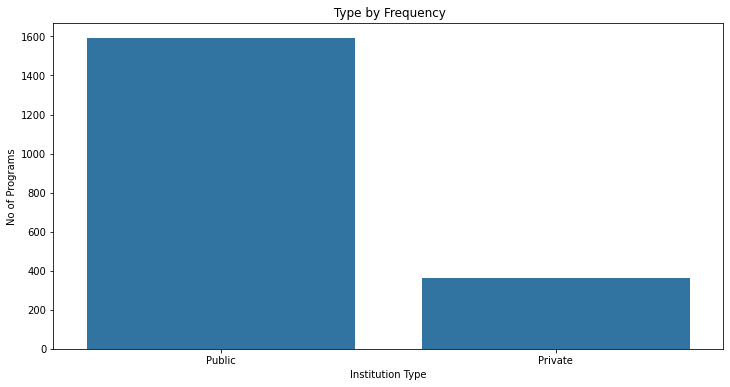

In [42]:
# institutions type by frequency
institution_type = cutoff_df['institution_type'].value_counts()

plt.figure(figsize=(12, 6)) 
sns.barplot(y=institution_type.values, x=institution_type.index)

plt.ylabel("No of Programs")
plt.xlabel("Institution Type")
plt.title(" Type by Frequency");

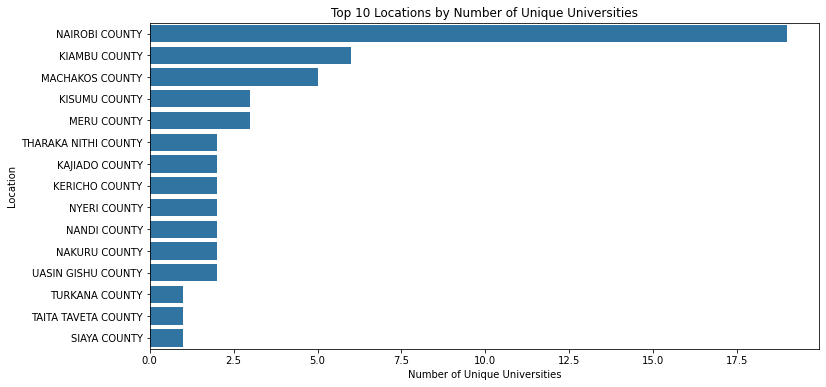

In [43]:
# dropping duplicates to get one entry per institution-location
unique_universities = cutoff_df[['institution', 'location']].drop_duplicates()
 
# group by location and count unique universities
location_uni = unique_universities.groupby('location').size().sort_values(ascending=False)

# top 10 locations by unique universities
top_locations = location_uni.head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.values, y=top_locations.index)

plt.xlabel("Number of Unique Universities")
plt.ylabel("Location")
plt.title("Top 10 Locations by Number of Unique Universities");


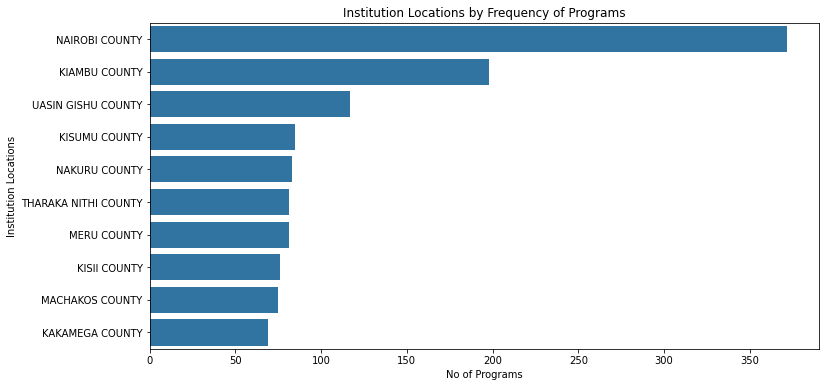

In [44]:
# institutions location by frequency
location = cutoff_df['location'].value_counts().iloc[:10]

plt.figure(figsize=(12, 6)) 
sns.barplot(x=location.values, y=location.index)

plt.xlabel("No of Programs")
plt.ylabel("Institution Locations")
plt.title("Institution Locations by Frequency of Programs");

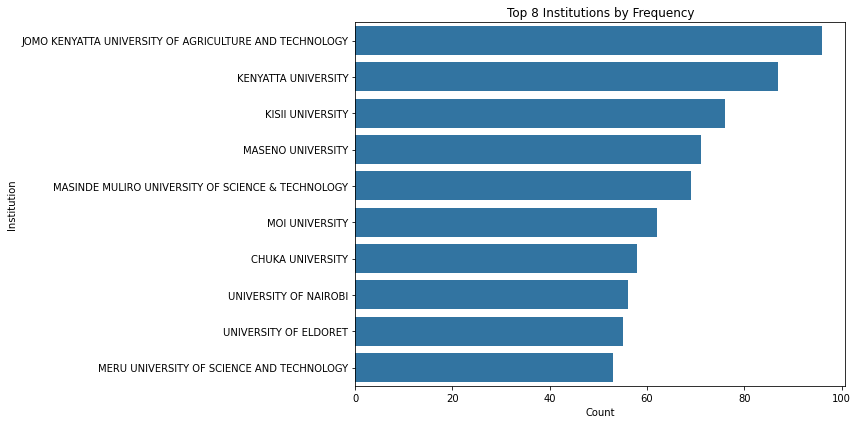

In [45]:
# top 8 institutions by frequency
top_institutions = cutoff_df['institution'].value_counts().iloc[:10]

plt.figure(figsize=(12, 6)) 
sns.barplot(x=top_institutions.values, y=top_institutions.index)

plt.xlabel("Count")
plt.ylabel("Institution")
plt.title("Top 8 Institutions by Frequency")
plt.tight_layout()
plt.show()

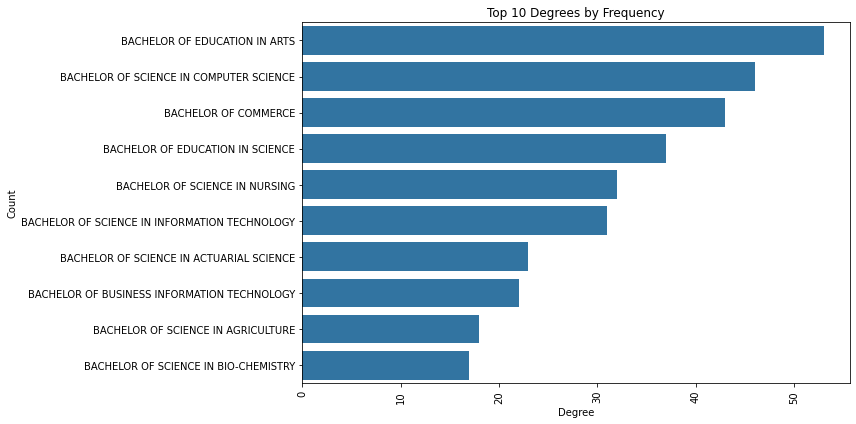

In [46]:
top_degrees= cutoff_df['programme_name'].value_counts().iloc[:10]

plt.figure(figsize=(12, 6)) 
sns.barplot(x=top_degrees.values, y=top_degrees.index)

plt.xticks(rotation=90)
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Top 10 Degrees by Frequency")
plt.tight_layout()
plt.show()

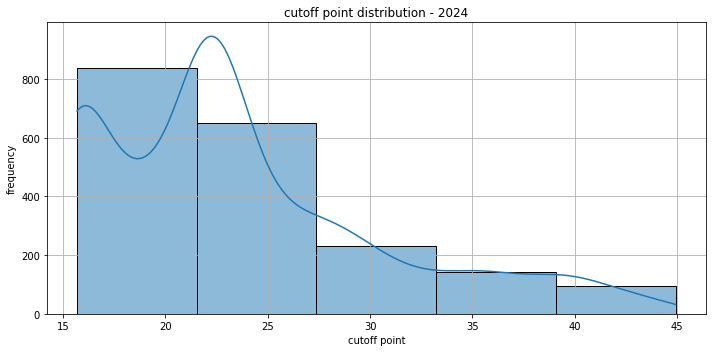

In [47]:
plt.figure(figsize=(10, 5))  
sns.histplot(cutoff_df['cutoff_2024'], bins=5, kde=True)  

plt.title("cutoff point distribution - 2024")
plt.xlabel("cutoff point")
plt.ylabel("frequency")
plt.xticks() 
plt.grid(True)
plt.tight_layout()
plt.show()

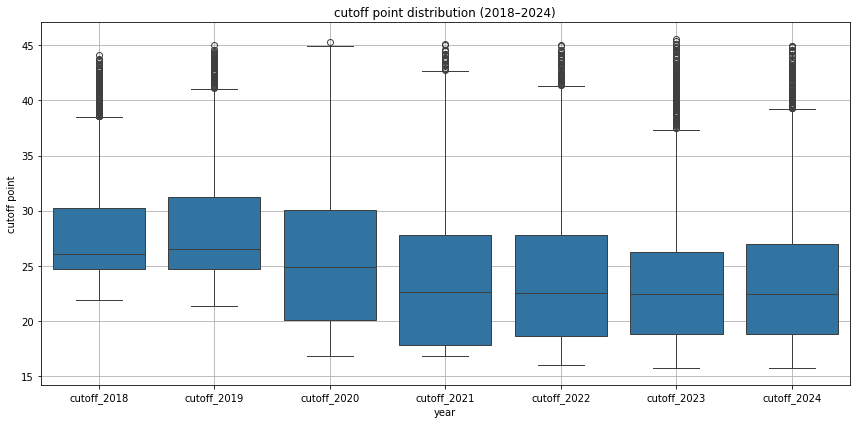

In [48]:
# define year columns
year_cols = ["cutoff_"+str(y) for y in range(2018, 2025)]

# ensure numeric values
cutoff_df[year_cols] = cutoff_df[year_cols].apply(pd.to_numeric, errors='coerce')

# reshape to long format
cutoff_df_melted = cutoff_df.melt(value_vars=year_cols, var_name='Year', value_name='Cutoff')

# plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Cutoff', data=cutoff_df_melted)

plt.title("cutoff point distribution (2018–2024)")
plt.xlabel("year")
plt.ylabel("cutoff point")
plt.grid(True)
plt.tight_layout()
plt.show()

## Bivariate Analysis

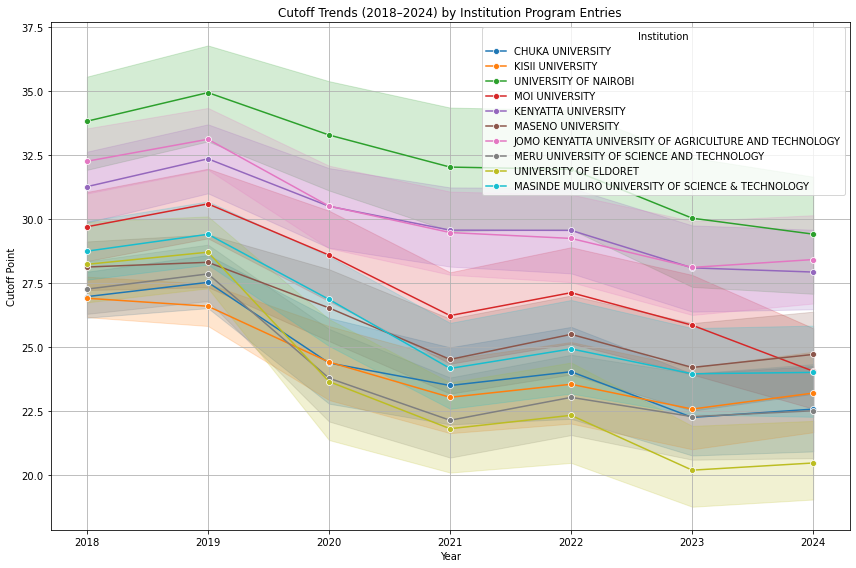

In [49]:
# define year columns first
year_cols = [f"cutoff_{y}" for y in range(2018, 2025)]

# pick top 5 institutions
top_institutions = cutoff_df['institution'].value_counts().nlargest(10).index
df_top = cutoff_df[cutoff_df['institution'].isin(top_institutions)]

# reshape data to long format
df_melted = df_top.melt(
    id_vars='institution',
    value_vars=year_cols,
    var_name='Year',
    value_name='Cutoff'
)

# extract year as integer (remove "cutoff_")
df_melted['Year'] = df_melted['Year'].str.replace("cutoff_", "").astype(int)

# plot line chart
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_melted, x='Year', y='Cutoff', hue='institution', marker='o')

plt.title("Cutoff Trends (2018–2024) by Institution Program Entries")
plt.xlabel("Year")
plt.ylabel("Cutoff Point")
plt.legend(title='Institution')
plt.grid(True)
plt.tight_layout()
plt.show()


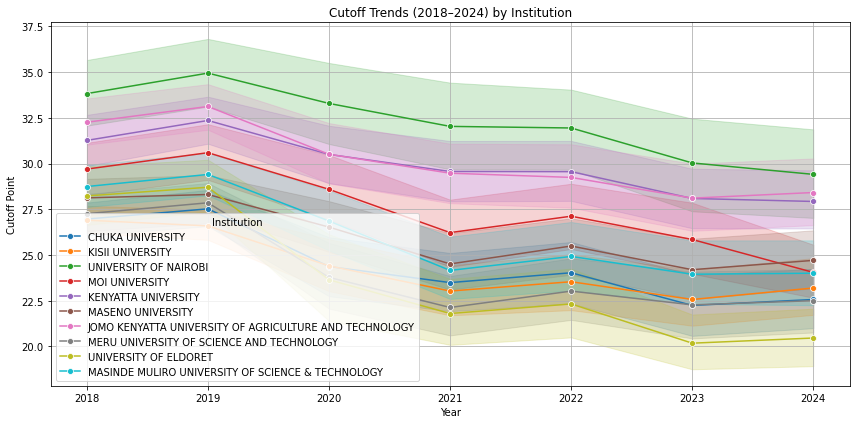

In [50]:
# pick top 5 institutions
top_institutions = cutoff_df['institution'].value_counts().nlargest(10).index
df_top = cutoff_df[cutoff_df['institution'].isin(top_institutions)]

# reshape data to long format
df_melted = df_top.melt(
    id_vars='institution',
    value_vars=year_cols,
    var_name='Year',
    value_name='Cutoff'
)

# clean up Year
df_melted['Year'] = df_melted['Year'].str.replace("cutoff_", "").astype(int)

# plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Year', y='Cutoff', hue='institution', marker='o')

plt.title("Cutoff Trends (2018–2024) by Institution")
plt.xlabel("Year")
plt.ylabel("Cutoff Point")
plt.legend(title='Institution', loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()

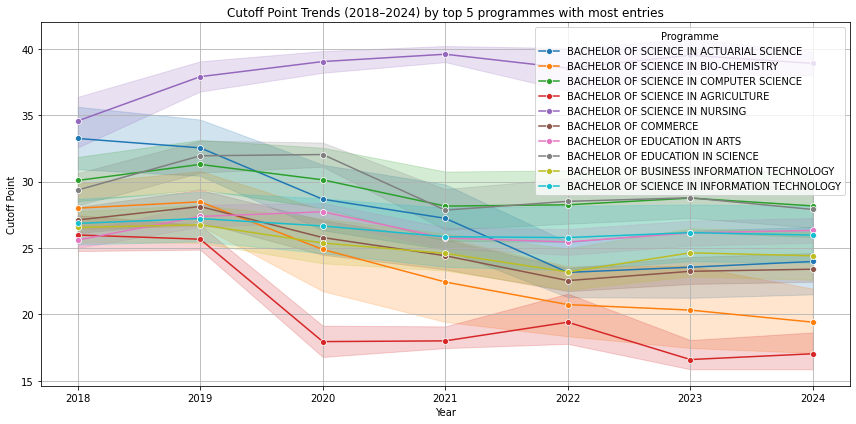

In [51]:
# Select top 5 programmes with most entries
top_programmes = cutoff_df['programme_name'].value_counts().nlargest(10).index
cutoff_df_top = cutoff_df[cutoff_df['programme_name'].isin(top_programmes)]

# Melt the DataFrame to long format
cutoff_df_melted = cutoff_df_top.melt(
    id_vars='programme_name',
    value_vars=year_cols,
    var_name='Year',
    value_name='Cutoff'
)

# Clean up Year column (remove "" and convert to int)
cutoff_df_melted['Year'] = cutoff_df_melted['Year'].str.replace("cutoff_", "").astype(int)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=cutoff_df_melted, x='Year', y='Cutoff', hue='programme_name', marker='o')

plt.title("Cutoff Point Trends (2018–2024) by top 5 programmes with most entries")
plt.xlabel("Year")
plt.ylabel("Cutoff Point")
plt.legend(title="Programme")
plt.grid(True)
plt.tight_layout()
plt.show()


## Multivariate Analysis

# Preprocessing

In [52]:
# features and targe
feature_years = year_cols[:-1]
target_year = year_cols[-1]

# building modeling DataFrame
cutoff_df_model = cutoff_df[feature_years + ['programme_code', target_year]].dropna()

X = cutoff_df_model[feature_years + ['programme_code']]
y = cutoff_df_model[target_year]

# preprocessor: just passthrough (since all features are numeric)
preprocessor = ColumnTransformer(
    transformers=[
        ('features', 'passthrough', feature_years + ['programme_code'])
    ]
)


**Train-test spliting**

In [53]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeling

**RandomForestRegressor**

In [54]:

# pipeline
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42))
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('features', 'passthrough',
                                                  ['cutoff_2018', 'cutoff_2019',
                                                   'cutoff_2020', 'cutoff_2021',
                                                   'cutoff_2022', 'cutoff_2023',
                                                   'programme_code'])])),
                ('rf',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

**XGBRegressor**

In [55]:

xgbmodel = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('xgb', XGBRegressor(n_estimators=200, random_state=42))
])

xgbmodel.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('features', 'passthrough',
                                                  ['cutoff_2018', 'cutoff_2019',
                                                   'cutoff_2020', 'cutoff_2021',
                                                   'cutoff_2022', 'cutoff_2023',
                                                   'programme_code'])])),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stoppi...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

**MLPRegressor**

In [56]:
# Example with 4 hidden layers: 256 → 128 → 64 → 32
mlp = MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32),
                   activation='relu',
                   solver='adam',
                   max_iter=500,
                   random_state=42)


mlp.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32), max_iter=500,
             random_state=42)

# Evaluation

In [57]:
y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R²: 0.9493672779677758
MSE: 2.4037743273474246
RMSE: 1.5504110188422373


In [58]:
y_pred = xgbmodel.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R²: 0.9487438844917786
MSE: 2.433369758390697
RMSE: 1.5599262028668845


In [59]:
y_pred = mlp.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R²: -5.1351941644193415
MSE: 291.26662825548107
RMSE: 17.066535332500298


## Predict 2025 Cutoff

In [60]:
cutoff_df_features = cutoff_df[feature_years + ['programme_code']].copy()
cutoff_df["pred_cutoff_2025"] = model.predict(cutoff_df_features)

In [61]:
## Generate Student

In [62]:
cutoff_df = cutoff_df.copy()

In [63]:
cutoff_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1956 entries, 0 to 2049
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   programme_code       1956 non-null   object 
 1   institution          1956 non-null   object 
 2   programme_name       1956 non-null   object 
 3   cutoff_2018          1550 non-null   float64
 4   cutoff_2019          1662 non-null   float64
 5   cutoff_2020          1758 non-null   float64
 6   cutoff_2021          1831 non-null   float64
 7   cutoff_2022          1875 non-null   float64
 8   cutoff_2023          1917 non-null   float64
 9   cutoff_2024          1956 non-null   float64
 10  #                    1956 non-null   int64  
 11  key                  1956 non-null   object 
 12  institution_type     1956 non-null   object 
 13  parent_ministry      1956 non-null   object 
 14  location             1956 non-null   object 
 15  programme_name_code  1956 non-null   object

In [64]:
cutoff_df.columns

Index(['programme_code', 'institution', 'programme_name', 'cutoff_2018',
       'cutoff_2019', 'cutoff_2020', 'cutoff_2021', 'cutoff_2022',
       'cutoff_2023', 'cutoff_2024', '#', 'key', 'institution_type',
       'parent_ministry', 'location', 'programme_name_code',
       'pred_cutoff_2025'],
      dtype='object')

In [65]:
degree_req_df.columns

Index(['programme_name', 'cluster', 'subcluster', 'subject_1',
       'subject_1_grade', 'subject_2', 'subject_2_grade', 'subject_3',
       'subject_3_grade', 'subject_4', 'subject_4_grade'],
      dtype='object')

In [66]:
# Step 1: Merge with cutoff_df
degree_req_cutoff_df = degree_req_df[
    ['programme_name', 'cluster', 'subcluster',
     'subject_1', 'subject_1_grade',
     'subject_2', 'subject_2_grade',
     'subject_3', 'subject_3_grade',
     'subject_4', 'subject_4_grade']
].merge(
    cutoff_df[['programme_name','programme_code','institution','key', 'institution_type', 'location', 'programme_name_code', 'pred_cutoff_2025']],
    on='programme_name',
    how='left'
)

# Step 2: Get unique subcluster + subjects + grades
unique_subclusters = degree_req_cutoff_df.drop_duplicates(
    subset=['subcluster', 'subject_1', 'subject_1_grade',
            'subject_2', 'subject_2_grade',
            'subject_3', 'subject_3_grade',
            'subject_4', 'subject_4_grade']
)[[
    'subcluster',
    'subject_1', 'subject_1_grade',
    'subject_2', 'subject_2_grade',
    'subject_3', 'subject_3_grade',
    'subject_4', 'subject_4_grade'
]]
degree_req_cutoff_df.head()

,programme_name,cluster,subcluster,subject_1,subject_1_grade,subject_2,subject_2_grade,subject_3,subject_3_grade,subject_4,subject_4_grade,programme_code,institution,key,institution_type,location,programme_name_code,pred_cutoff_2025
0,BACHELOR OF LAWS,1,1A,ENG/KIS,B,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,Null,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV / any_...,Null,1105134,CHUKA UNIVERSITY,CU,Public,THARAKA NITHI COUNTY,134,37.962985
1,BACHELOR OF LAWS,1,1A,ENG/KIS,B,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,Null,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV / any_...,Null,1093134,UNIVERSITY OF EMBU,UOEM,Public,EMBU COUNTY,134,38.162030
2,BACHELOR OF LAWS,1,1A,ENG/KIS,B,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,Null,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV / any_...,Null,1087134,KISII UNIVERSITY,KSU,Public,KISII COUNTY,134,38.481375
3,BACHELOR OF LAWS,1,1A,ENG/KIS,B,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,Null,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV / any_...,Null,1061134,KABARAK UNIVERSITY,KABU,Private,NAKURU COUNTY,134,37.874010
4,BACHELOR OF LAWS,1,1A,ENG/KIS,B,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,Null,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV / any_...,Null,1078134,AFRICA NAZARENE UNIVERSITY,ANU,Private,KAJIADO COUNTY,134,34.439415


In [67]:
degree_req_cutoff_df.to_csv("degree_req_cutoff.csv", index=False)

In [68]:
degree_req_cutoff_df.columns

Index(['programme_name', 'cluster', 'subcluster', 'subject_1',
       'subject_1_grade', 'subject_2', 'subject_2_grade', 'subject_3',
       'subject_3_grade', 'subject_4', 'subject_4_grade', 'programme_code',
       'institution', 'key', 'institution_type', 'location',
       'programme_name_code', 'pred_cutoff_2025'],
      dtype='object')

In [69]:
degree_req_cutoff_df.shape[0]

1688

In [70]:
unique_subclusters

,subcluster,subject_1,subject_1_grade,subject_2,subject_2_grade,subject_3,subject_3_grade,subject_4,subject_4_grade
0,1A,ENG/KIS,B,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,Null,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV / any_...,Null
17,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null
180,2B,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B / any_GROU...,Null,Any_GROUP_III,Null,A_GROUP_II / 2nd_GROUP_III / any_GROUP_IV / an...,Null
258,3A,ENG/KIS,C+,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B / any_GROU...,Null,Any_GROUP_III,Null,A_GROUP_II / 2nd_GROUP_III / any_GROUP_IV / an...,Null
323,3B,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B / any_GROU...,Null,Any_GROUP_III,Null,A_GROUP_II / 2nd_GROUP_III / any_GROUP_IV / an...,Null
...,...,...,...,...,...,...,...,...,...
1636,19H,ENG,C+,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B / any_GROU...,Null,2nd_GROUP_II,Null,KIS / 3rd_GROUP_II / 2nd_GROUP_III / any_GROUP...,Null
1638,19I,ENG,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B / any_GROU...,Null,2nd_GROUP_II,Null,KIS / 3rd_GROUP_II / 2nd_GROUP_III / any_GROUP...,Null
1667,19J,ENG,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B / any_GROU...,Null,2nd_GROUP_II,Null,KIS / 3rd_GROUP_II / 2nd_GROUP_III / any_GROUP...,Null
1669,19K,CRE/IRE/HRE,Null,ENG/KIS,Null,2nd_GROUP_III,Null,A_GROUP_II / a_GROUP_IV / any_GROUP_V,Null
